In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
df_pred = pd.read_csv('data/gluonts_df_tpw_max_predict.csv')
df_test = pd.read_csv('data/gluonts_df_tpw_max_testing.csv')

title1 = 'Maximum Precipitable Water'
title2 = 'Maximum Precipitable Water Distribution'
label2 = 'Maximum Precipitable Water (mm)'
outfile1 = 'max_tpw_prophet.png'
outfile2 = 'max_tpw_prophet_pdf.png'
outfile3 = 'max_tpw_prophet_range.png'

In [3]:
# df_pred = pd.read_csv('data/gluonts_df_tpw_min_predict.csv')
# df_test = pd.read_csv('data/gluonts_df_tpw_min_testing.csv')

# title1 = 'Minimum Precipitable Water'
# title2 = 'Minimum Precipitable Water Distribution'
# label2 = 'Minimum Precipitable Water (mm)'
# outfile1 = 'min_tpw_prophet.png'
# outfile2 = 'min_tpw_prophet_pdf.png'
# outfile3 = 'min_tpw_prophet_range.png'

In [4]:
dfs_to_concat = []
for i in np.arange(2405):
    j = i+1
    data = {
        'date': df_test.iloc[:, 0].values,
        'test': df_test.iloc[:, j].values,
        'pred': df_pred.iloc[:, j].values,
        'coord': df_test.columns[j],
        'locid': j
    }
    new_df = pd.DataFrame(data)
    
    dfs_to_concat.append(new_df)

# Concatenate the list of DataFrames
all_df = pd.concat(dfs_to_concat, axis=0, ignore_index=True)

In [5]:
diff = all_df.pred.values - all_df.test.values
all_df['diff'] = diff

In [6]:
### groupby time

df_date_bias = all_df.groupby(['date']).mean(numeric_only=True)
df_date_sd = all_df.groupby(['date']).std(numeric_only=True)

# df_loc_bias = all_df.groupby(['locid']).mean(numeric_only=True)
# df_loc_sd = all_df.groupby(['locid']).std(numeric_only=True)

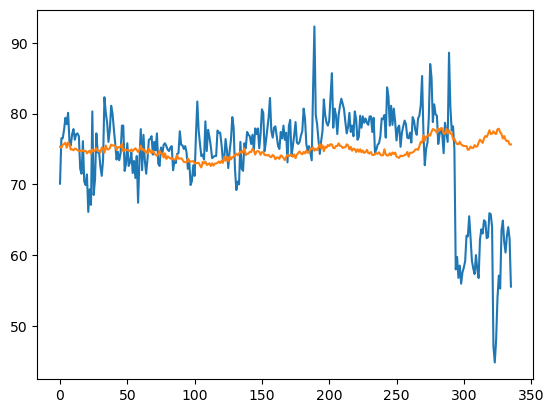

In [7]:
new_df['test'].plot()
new_df['pred'].plot()
plt.show()

In [8]:
def get_stat(x, y):
    
    diff = y - x
    mean = np.mean(diff)
    std = np.std(diff)
    ct = len(diff)
    
    return mean, std, ct

In [9]:
x = all_df['test']
y = all_df['pred']
color = all_df['locid']
# size = np.sqrt(df['T00'])
cmap = plt.cm.nipy_spectral

In [10]:
mean, std, ct = get_stat(x, y)
stat_text = f'Bias = {mean:.1f}\xb0\nStdv. = {std:.1f}\xb0\nCounts = {ct:,}'

In [11]:
stat_text

'Bias = 4.9°\nStdv. = 14.0°\nCounts = 808,080'

In [12]:
# fig, ax = plt.subplots(figsize=(9,7))
# plt.scatter(x,y,s=1,c=color,cmap=cmap)
# # plt.scatter(x,y,s=1,c='blue')
# ax.axis([0,70,0,70])
# ax.plot([0,70],[0,70],c='red',alpha=0.5)
# ax.set_title('Maximum 2m Temperature')
# ax.set_xlabel('Actual')
# ax.set_ylabel('Prediction')
# cbar = plt.colorbar(label='Location')
# ax.grid()
# ax.text(0.6,0.2,stat_text,transform=ax.transAxes,verticalalignment='top',fontsize=12,color='black')
# plt.show()

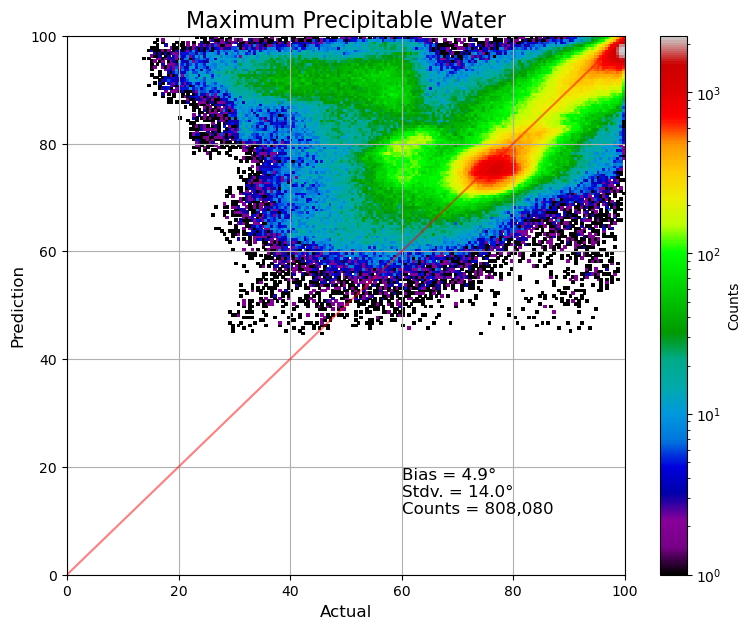

In [13]:
plt.figure(figsize=(9,7))
plt.hist2d(x, y,bins=(200,200),cmap=cmap, density=False, range=[(0,100),(0,100)], norm=colors.LogNorm())

# plt.hist2d(x, y,bins=(100,100),cmap='cubehelix_r', density=False, range=[(10,40),(10,40)], norm=colors.LogNorm(vmin=1e0,vmax=1e2))
# plt.hist2d(x, y,bins=(100,100),cmap='cubehelix_r', density=False, range=[(10,40),(10,40)], norm=colors.Normalize())

#title1 = 'Maximum 2m Temperature'

plt.plot([0,100],[0,100],c='red',alpha=0.5)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Prediction',fontsize=12)
plt.title(title1,fontsize=16)
ax = plt.gca()
plt.text(0.6,0.2,stat_text,transform=ax.transAxes,verticalalignment='top',fontsize=12,color='black')
plt.colorbar(label='Counts')
ax.grid()

plt.savefig(outfile1)
plt.show()

In [14]:
import seaborn as sns

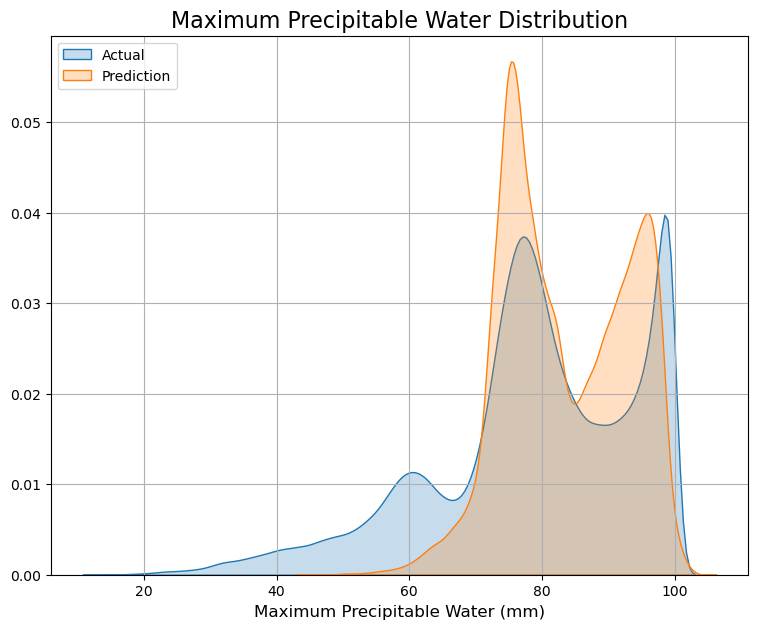

In [15]:
# Set up the figure and axis
plt.figure(figsize=(9, 7))

# Plot kernel density estimates using Seaborn
sns.kdeplot(x, label='Actual', fill=True)
sns.kdeplot(y, label='Prediction', fill=True)

# title2 = 'Maximum 2m Temperature Distribution'
# label2 = 'Maximum 2m Temperature (degree)'

# Set labels and title
plt.xlabel(label2, fontsize=12)
plt.ylabel('')
plt.title(title2, fontsize=16)

# Show legend
plt.legend(loc='upper left')
plt.grid()

plt.savefig(outfile2)
# Show the plot
plt.show()

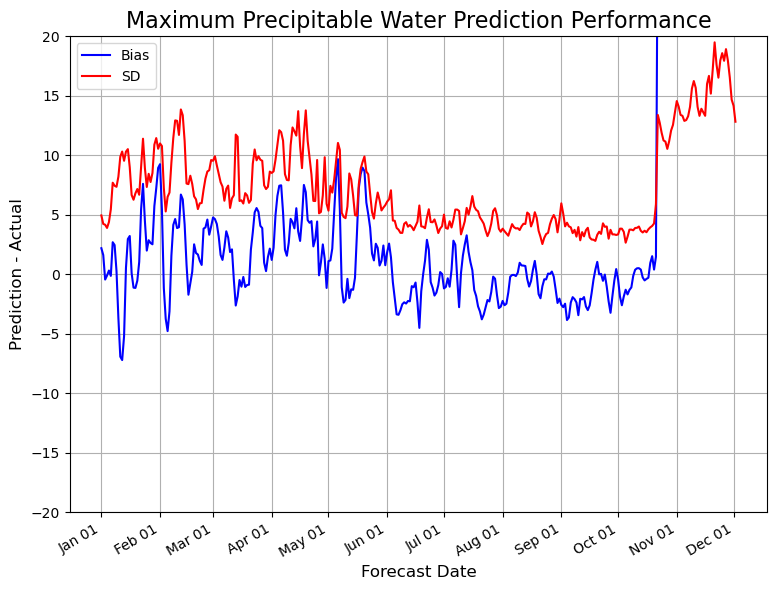

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(9,7))
# Assuming 'date' is the index
df_date_bias['diff'].plot(linestyle='-', color='b', label='Bias')
df_date_sd['diff'].plot(linestyle='-', color='r', label='SD')


# Format x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Add labels and title
plt.xlabel('Forecast Date', fontsize=12)
plt.ylabel('Prediction - Actual', fontsize=12)
plt.title(f'{title1} Prediction Performance', fontsize=16)

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.legend()

plt.ylim([-20,20])
plt.grid()

# save output png
plt.savefig(outfile3)

plt.show()
